In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

1st task in machine learning
import the data

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dementia_dataset (2).csv")# data import

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [ ]:
data.fillna(method="ffill", inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         373 non-null    float64
 10  MMSE        373 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [ ]:
# sns.pairplot(data)

In [ ]:
labels= data["Group"]

In [ ]:
data = data.drop(["Subject ID", "MRI ID", "Visit", "MR Delay", "Hand"], axis = 1)

In [ ]:
data['Group'].replace(["Nondemented", "Demented", "Converted"], [0, 1, 1], inplace=True)

In [ ]:
data['Group'].unique()

array([0, 1])

In [ ]:
data.head()

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,0,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,1,M,75,12,2.0,23.0,0.5,1678,0.736,1.046
3,1,M,76,12,2.0,28.0,0.5,1738,0.713,1.010
4,1,M,80,12,2.0,22.0,0.5,1698,0.701,1.034


In [ ]:
ct = make_column_transformer(
                             (MinMaxScaler(), ["Age", "EDUC", "SES", "MMSE", "eTIV", "nWBV", "ASF"]),
                             (OneHotEncoder(), ["M/F"]),
                             remainder="passthrough"
                        )

X=data.iloc[:, [1, 2, 3, 4, 5, 6, 7, 8, 9]]
y=data.iloc[:, [0]]

# X=data.drop(index=0, axis = 0)
# y=data["Group"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [ ]:
ct.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV',
                                  'ASF']),
                                ('onehotencoder', OneHotEncoder(), ['M/F'])])

In [ ]:
y_train.head()

,Group
192,0
75,1
84,0
361,0
16,1


In [ ]:
data.tail()# data.head(10)

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
368,1,M,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,1,M,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,0,F,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,0,F,63,13,2.0,30.0,0.0,1327,0.796,1.323
372,0,F,65,13,2.0,30.0,0.0,1333,0.801,1.317


In [ ]:
X_train_norm = ct.transform(X_train)
X_test_norm = ct.transform(X_test)

In [ ]:
X_train_norm

array([[0.39473684, 0.35294118, 0.75      , ..., 0.        , 1.        ,
        0.        ],
       [0.76315789, 0.35294118, 0.75      , ..., 0.        , 1.        ,
        0.5       ],
       [0.26315789, 0.64705882, 0.5       , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.57894737, 0.70588235, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.76315789, 0.58823529, 0.25      , ..., 0.        , 1.        ,
        0.5       ],
       [0.23684211, 0.58823529, 0.5       , ..., 1.        , 0.        ,
        0.        ]])

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# Compile the model

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
              metrics=["accuracy"])

# Fit the model to the normalized training dataset

model.fit(X_train_norm, y_train, epochs=200, verbose=1, validation_data=(X_test_norm, y_test))

Epoch 1/200
10/10 [==============================] - 7s 32ms/step - loss: 0.4042 - accuracy: 0.7987 - val_loss: 0.5471 - val_accuracy: 0.8800
Epoch 2/200
10/10 [==============================] - 0s 8ms/step - loss: 0.1690 - accuracy: 0.9597 - val_loss: 0.4006 - val_accuracy: 0.8800
Epoch 3/200
10/10 [==============================] - 0s 9ms/step - loss: 0.1554 - accuracy: 0.9597 - val_loss: 0.7734 - val_accuracy: 0.8800
Epoch 4/200
10/10 [==============================] - 0s 10ms/step - loss: 0.1729 - accuracy: 0.9497 - val_loss: 0.5195 - val_accuracy: 0.8800
Epoch 5/200
10/10 [==============================] - 0s 9ms/step - loss: 0.1750 - accuracy: 0.9631 - val_loss: 0.3389 - val_accuracy: 0.8800
Epoch 6/200
10/10 [==============================] - 0s 7ms/step - loss: 0.1498 - accuracy: 0.9631 - val_loss: 0.3694 - val_accuracy: 0.8800
Epoch 7/200
10/10 [==============================] - 0s 8ms/step - loss: 0.1509 - accuracy: 0.9631 - val_loss: 0.3773 - val_accuracy: 0.8800
Epoch 8/200

In [ ]:
model.evaluate(X_test_norm, y_test)

3/3 [==============================] - 0s 4ms/step - loss: 0.6071 - accuracy: 0.9200


[0.6070937514305115, 0.9200000166893005]

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                704       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 6,977
Trainable params: 6,977
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_preds = model.predict(X_test_norm)

3/3 [==============================] - 0s 3ms/step


In [ ]:
y_preds[y_preds>0.5]=1
y_preds[y_preds<0.5]=0

In [ ]:
np.unique(y_preds)

array([0., 1.], dtype=float32)

In [ ]:
cfg= confusion_matrix(y_test, tf.round(tf.squeeze(tf.math.abs(y_preds))))
cfg

array([[30,  2],
       [ 4, 39]])

In [ ]:
pet = tf.round(tf.squeeze(tf.math.abs(y_preds)))

In [ ]:
tf.unique(pet)

Unique(y=<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1., 0.], dtype=float32)>, idx=<tf.Tensor: shape=(75,), dtype=int32, numpy=
array([0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0], dtype=int32)>)

In [ ]:
y_train.Group.unique()

array([0, 1])

In [ ]:
y_test

,Group
327,1
33,1
15,1
314,0
57,1
...,...
94,1
195,1
311,0
292,0


In [ ]:
y_test.Group.unique()

array([1, 0])

Text(0.5, 1.0, 'Confusion_Matrix')

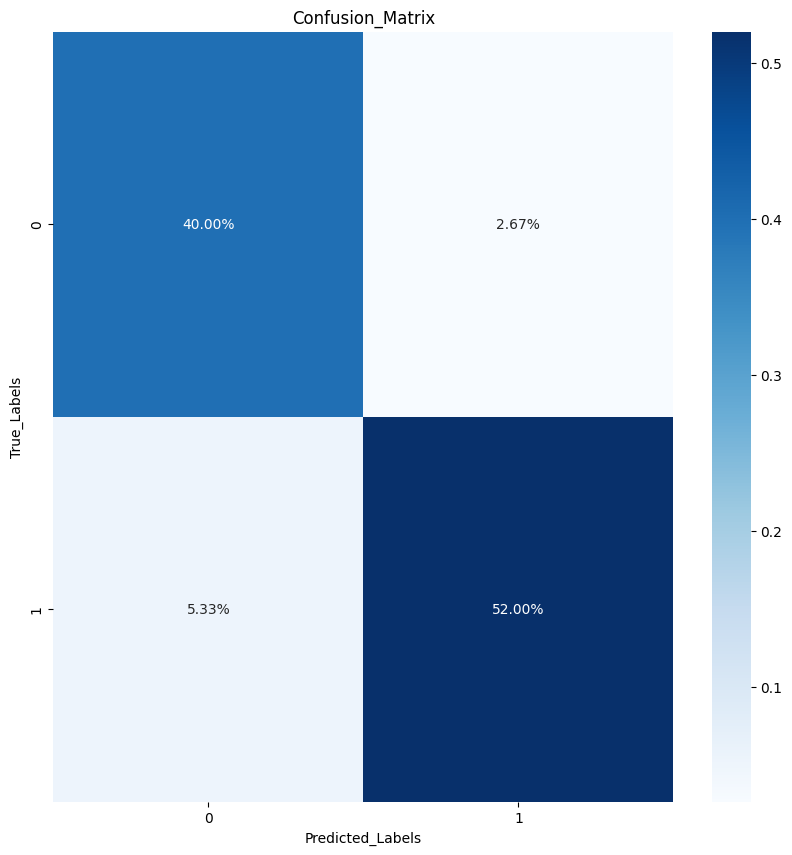

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap((cfg/np.sum(cfg)),
            fmt="0.2%",
            cmap="Blues",
            annot=True)
plt.xlabel("Predicted_Labels")
plt.ylabel("True_Labels")
plt.title("Confusion_Matrix")

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_2 = RandomForestClassifier()
model_2.fit(X_train_norm, y_train)
model_2.score(X_test_norm, y_test)

<ipython-input-34-dacf7b6cc8cc>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_2.fit(X_train_norm, y_train)


0.9066666666666666

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Load your dataset (replace 'dataset.csv' with your data file)
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dementia_dataset (2).csv')

# Assuming that your target variable (dementia disease) is in a column named 'target'
#X = data.drop('target', axis=1)
#y = data['target']

# Convert categorical variables to one-hot encoded representation
X = pd.get_dummies(data)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Feature Scaling (optional but can be beneficial for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Feature Selection using Chi-square test
k_best = SelectKBest(score_func=chi2, k=5)  # Replace '5' with the number of features you want to select
X_train_best = k_best.fit_transform(X_train, y_train)
X_test_best = k_best.transform(X_test)

# Build an Artificial Neural Network model
model = MLPClassifier(hidden_layer_sizes=(50, 25), random_state=42)  # Adjust the hidden_layer_sizes as needed
model.fit(X_train_best, y_train)


ValueError: ignored

In [ ]:
# Make predictions
y_pred = model.predict(X_test_best)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')